<a href="https://colab.research.google.com/github/Valeriy1990/Neural_networks/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D0%B1%D1%83%D0%BA%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Распознавание рукописных букв

In [21]:
!pip install tensorflow Keras

In [22]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [23]:
X = dataset[:,1:785]
Y = dataset[:,0]
dataset

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
dataset.shape

(372451, 785)

In [25]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)


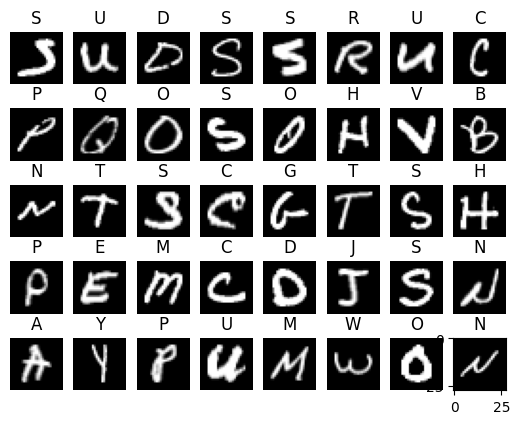

In [26]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

In [27]:
x_train.shape

(297960, 784)

In [28]:
x_test.shape

(74491, 784)

In [29]:
y_train.shape

(297960,)

In [30]:
y_test.shape

(74491,)

## Моделирование нейронной

In [31]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

## Компиляция модели

* **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;

* **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;

* **метрики для мониторинга на этапах обучения и тестирования** — здесь нас
будет интересовать только точность (`accuracy` - доля правильно классифицированных изображений).

In [32]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

## Подготовка данных

In [33]:
# изменение формы тензора
x_train = x_train.reshape((x_train.shape[0], 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train.astype('float32') / 255

# изменение формы тензора
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test = x_test.astype('float32') / 255

Векторизовать метки можно одним из двух способов: сохранить их в тензоре целых чисел или использовать прямое кодирование. Прямое кодирование (onehot encoding) широко используется для форматирования категорий и также называется кодированием категорий (categorical encoding).

В данном случае прямое кодирование меток заключается в конструировании вектора с нулевыми элементами и со значением 1 в элементе, индекс которого соответствует индексу метки

In [34]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 26 классов
y_test = to_categorical(y_test, 26)   # Кодируем тестовые метки на 26 классов

## Обучение и оценка модели

In [35]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8744 - loss: 0.4594 - val_accuracy: 0.9621 - val_loss: 0.1330
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9710 - loss: 0.1061 - val_accuracy: 0.9701 - val_loss: 0.1029
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9806 - loss: 0.0696 - val_accuracy: 0.9769 - val_loss: 0.0850
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9849 - loss: 0.0532 - val_accuracy: 0.9805 - val_loss: 0.0749
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9879 - loss: 0.0433 - val_accuracy: 0.9831 - val_loss: 0.0647


Теперь проверим, как модель распознает контрольный набор, с помощью метода модели evaluate(), передав ему в качестве позиционных аргументов тестовые изображения и метки. Разница между точностью на тренировочном и контрольном наборах демонстрирует пример переобучения (overfitting), когда модели машинного обучения показывают худшую точность на новом наборе данных по сравнению с тренировочным.

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9834 - loss: 0.0605
Точность на тестовом образцу: 0.9830986261367798
Потери на тестовом образце: 0.06465441733598709


## Предсказание

Выберем произвольную картинку из тестовой выборки и посмотрим на ее форму:

In [38]:
# Выбор нужной картинки из тестовой выборки
n = 23
x = x_test[n]

# Проверка формы данных
print(x.shape)

(784,)


Если мы в таком виде передадим данные в модель для предсказания, то получим ошибку. Нам необходимо добавить одну ось в начале, чтобы нейронка могла распознать пример.

In [39]:
import numpy as np

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [43]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 чисел
print(f'Вектор результата на 26 выходных нейронах:\n {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана буква: {word_dict[pred]}')
print(f'Правильная буква: {word_dict[np.argmax(y_test[n])]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Вектор результата на 26 выходных нейронах:
 [[4.23734146e-18 1.18263655e-14 5.87124425e-13 2.42957455e-12
  2.33011551e-17 8.44853320e-16 5.69401094e-14 5.16566499e-13
  1.19421375e-16 2.07389730e-11 4.49268139e-14 1.37130043e-12
  5.21508225e-14 1.39926362e-06 7.99963530e-14 9.75317993e-16
  3.69433860e-14 4.29611604e-17 6.25728014e-16 1.85779286e-18
  2.81898650e-07 7.42656804e-12 9.99998331e-01 5.03521954e-15
  4.96173435e-15 6.21172729e-19]]
Распознана буква: W
Правильная буква: W


## Визуализация процесса обучения

In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Построим график потерь на этапах обучения и проверки:

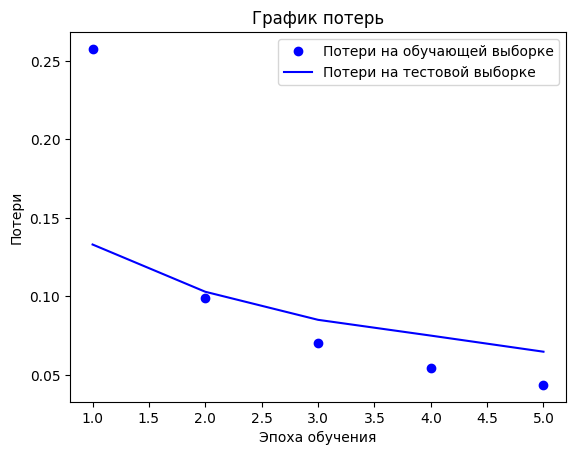

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

Построим график точности на этапах обучения и проверки:

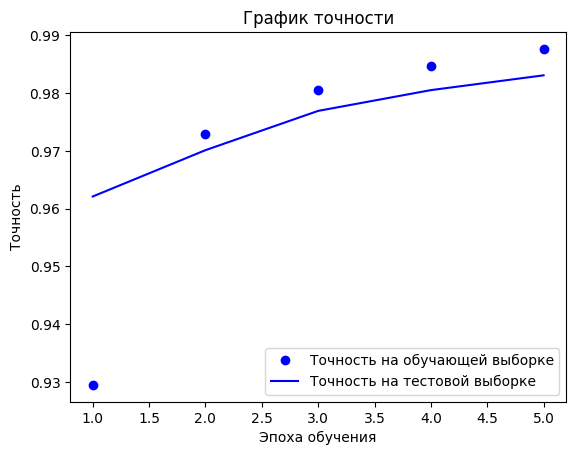

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()